In [1]:
import os
import pandas as pd
import h5py # needs conda/pip install h5py
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
# from jupyter_notebooks.app import predict
# import  app as app


df=pd.read_csv('/Users/moukthikamanapati/Desktop/BigData7245/data/CATALOG.csv',low_memory=False)

CATALOG_PATH='/Users/moukthikamanapati/Desktop/BigData7245/data/CATALOG.csv'
DATA_PATH    = '/Users/moukthikamanapati/Desktop/BigData7245/data'

# events=df[df.id.str.startswith('S835047')]







In [20]:
events=df[df.id.str.startswith('S858117')]
# events=df[df.id.str.startswith('S835047')]

# events=df[df.id.str.startswith('S760792')]
events

,id,file_name,file_index,img_type,time_utc,minute_offsets,episode_id,event_id,event_type,llcrnrlat,...,urcrnrlat,urcrnrlon,proj,size_x,size_y,height_m,width_m,data_min,data_max,pct_missing
31771,S858117,vis/2019/SEVIR_VIS_STORMEVENTS_2019_0901_0930.h5,106,vis,2019-09-19 15:20:00,-121:-116:-111:-106:-101:-96:-91:-86:-81:-76:-...,141836.0,858117.0,Flash Flood,28.236103,...,31.592792,-93.042437,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,768,768,384000.0,384000.0,0.008853,1.222140,0.0
45275,S858117,ir107/2019/SEVIR_IR107_STORMEVENTS_2019_0701_1...,490,ir107,2019-09-19 15:20:00,-121:-116:-111:-106:-101:-96:-91:-86:-81:-76:-...,141836.0,858117.0,Flash Flood,28.236103,...,31.592792,-93.042437,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,192,192,384000.0,384000.0,-87.157967,28.189871,0.0
46191,S858117,ir069/2019/SEVIR_IR069_STORMEVENTS_2019_0701_1...,491,ir069,2019-09-19 15:20:00,-121:-116:-111:-106:-101:-96:-91:-86:-81:-76:-...,141836.0,858117.0,Flash Flood,28.236103,...,31.592792,-93.042437,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,192,192,384000.0,384000.0,-86.394081,-15.916481,0.0
50043,S858117,vil/2019/SEVIR_VIL_STORMEVENTS_2019_0701_1231.h5,379,vil,2019-09-19 15:20:00,-120:-115:-110:-105:-100:-95:-90:-85:-80:-75:-...,141836.0,858117.0,Flash Flood,28.236103,...,31.592792,-93.042437,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,384,384,384000.0,384000.0,0.000000,254.000000,0.0
74778,S858117,lght/2019/SEVIR_LGHT_ALLEVENTS_2019_0901_1001.h5,0,lght,2019-09-19 15:20:00,NaN,141836.0,858117.0,Flash Flood,28.236103,...,31.592792,-93.042437,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,48,48,384000.0,384000.0,0.000000,166448.000000,0.0


In [13]:
def read_data( events, img_type, data_path=DATA_PATH ):
  

    fn = events[events.img_type==img_type].squeeze().file_name
    fi = events[events.img_type==img_type].squeeze().file_index
    with h5py.File(data_path + '/' + fn,'r') as hf:
        data=hf[img_type][fi]
        print(type(data))
    return data

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


(<matplotlib.image.AxesImage at 0x1575c9e10>, Text(0.5, 1.0, 'VIL'))

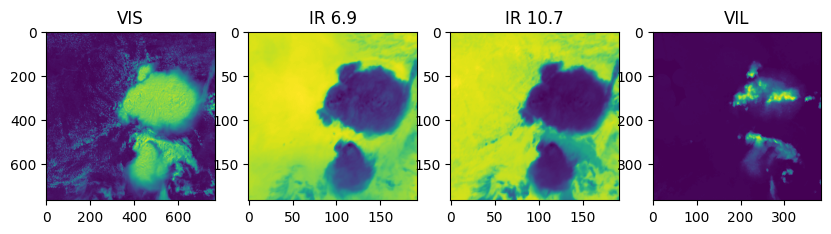

In [14]:
vis = read_data(events, 'vis')
ir069 = read_data(events, 'ir069')
ir107 = read_data(events, 'ir107')
vil = read_data(events, 'vil')

# plot a frame from each img_type
fig,axs = plt.subplots(1,4,figsize=(10,5))
frame_idx = 1
axs[0].imshow(vis[:,:,frame_idx]), axs[0].set_title('VIS')
axs[1].imshow(ir069[:,:,frame_idx]), axs[1].set_title('IR 6.9')
axs[2].imshow(ir107[:,:,frame_idx]), axs[2].set_title('IR 10.7')
axs[3].imshow(vil[:,:,frame_idx]), axs[3].set_title('VIL')

In [24]:
frame_idx=1
img = Image.fromarray((vis[:,:,frame_idx]),mode='I;16')
img.save('images/12/vis.png',"PNG")

img = Image.fromarray((ir069[:,:,frame_idx]),mode='I;16')
img.save('images/12/ir069.png',"PNG")

img = Image.fromarray((ir107[:,:,frame_idx]),mode='I;16')
img.save('images/12/ir107.png',"PNG")

img = Image.fromarray((vil[:,:,frame_idx]),mode='L')
img.save('images/12/vil.png',"PNG")

In [128]:
# frame_idx=39
# img = Image.fromarray((vil[:,:,frame_idx]),mode='I;16')
# img.save('../vis.png',"PNG")
# img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 3, 0],
       [0, 0, 0, ..., 3, 4, 4],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

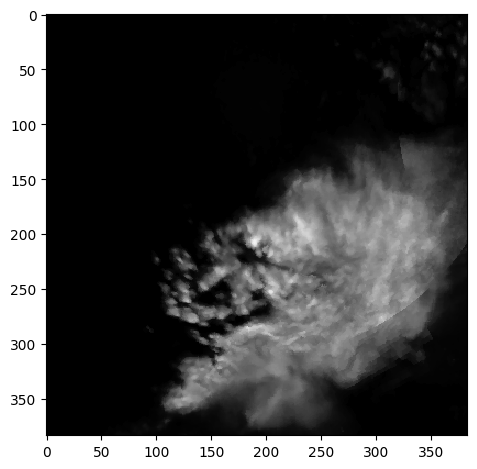

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread, imshow

image = imread('../vil.png', as_gray=True) 
image.shape, imshow(image)
image

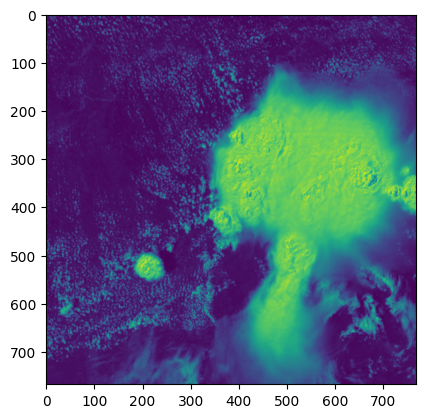

In [88]:
plt.imshow(vil[:,:,frame_idx])
plt.savefig('../vil.png')


plt.imshow(ir069[:,:,frame_idx])
plt.savefig('../ir069.png')

plt.imshow(ir107[:,:,frame_idx])
plt.savefig('../ir107.png')

plt.imshow(vis[:,:,frame_idx])
plt.savefig('../vis.png')

(<matplotlib.image.AxesImage at 0x14c78a350>, Text(0.5, 1.0, 'VIL'))

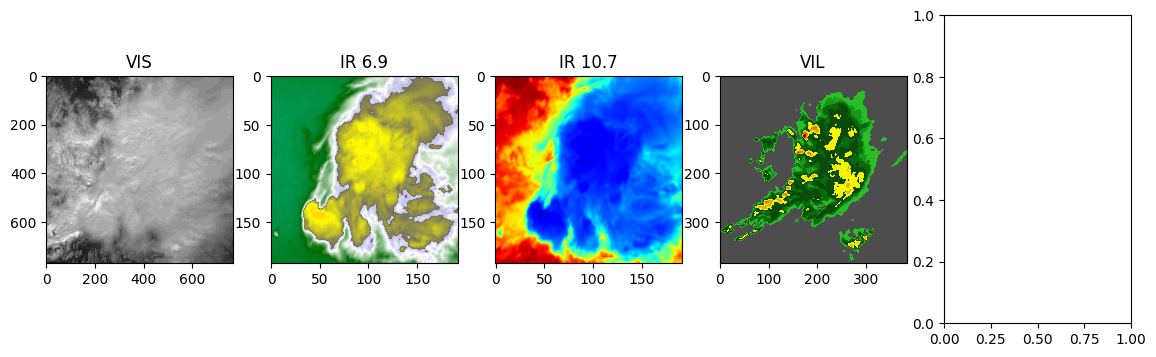

In [46]:
import sys
sys.path.append(DATA_PATH) # add sevir module to path
from sevir.display import get_cmap
# Get colormaps for encoded types
vis_cmap,vis_norm,vis_vmin,vis_vmax = get_cmap('vis',encoded=True)
ir069_cmap,ir069_norm,ir069_vmin,ir069_vmax = get_cmap('ir069',encoded=True)
ir107_cmap,ir107_norm,ir107_vmin,ir107_vmax = get_cmap('ir107',encoded=True)
vil_cmap,vil_norm,vil_vmin,vil_vmax = get_cmap('vil',encoded=True)

fig,axs = plt.subplots(1,5,figsize=(14,4))
frame_idx = 10
axs[0].imshow(vis[:,:,frame_idx],cmap=vis_cmap,norm=vis_norm), axs[0].set_title('VIS')
axs[1].imshow(ir069[:,:,frame_idx],cmap=ir069_cmap,norm=ir069_norm,vmin=ir069_vmin,vmax=ir069_vmax), axs[1].set_title('IR 6.9')
axs[2].imshow(ir107[:,:,frame_idx],cmap=ir107_cmap,norm=ir107_norm,vmin=ir107_vmin,vmax=ir107_vmax), axs[2].set_title('IR 10.7')
axs[3].imshow(vil[:,:,frame_idx],cmap=vil_cmap,norm=vil_norm,vmin=vil_vmin,vmax=vil_vmax), axs[3].set_title('VIL')


100.0
Default size in Inches [6.4 4.8]
Which should result in a %i x %i Image (640.0, 480.0)


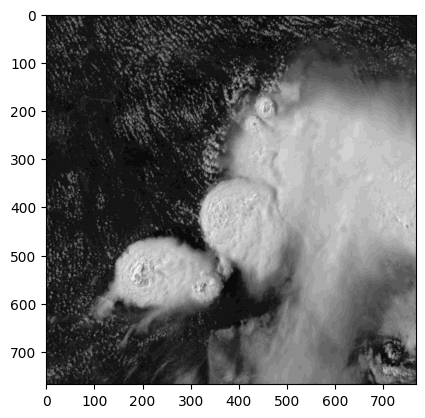

In [77]:
plt.imshow(vil[:,:,frame_idx],cmap=vil_cmap,norm=vil_norm,vmin=vil_vmin,vmax=vil_vmax)
plt.savefig('../vil.png')
F = plt.gcf()
DPI = F.get_dpi()
print(DPI)
frame_idx = 25
DefaultSize = F.get_size_inches()
print("Default size in Inches", DefaultSize)
print("Which should result in a %i x %i Image",(DPI*DefaultSize[0], DPI*DefaultSize[1]))
plt.imshow(ir069[:,:,frame_idx],cmap=ir069_cmap,norm=ir069_norm,vmin=ir069_vmin,vmax=ir069_vmax)
plt.savefig('../ir069.png')

plt.imshow(ir107[:,:,frame_idx],cmap=ir107_cmap,norm=ir107_norm,vmin=ir107_vmin,vmax=ir107_vmax)
plt.savefig('../ir107.png')

plt.imshow(vis[:,:,frame_idx],cmap=vis_cmap,norm=vis_norm)
plt.savefig('../vis.png')

100.0
Default size in Inches [6.4 4.8]
Which should result in a %i x %i Image (640.0, 480.0)


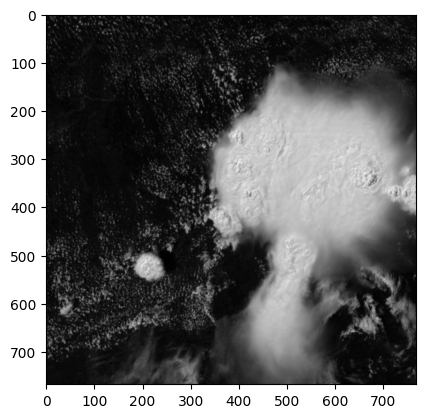

In [37]:
plt.imshow(vil[:,:,frame_idx],cmap = plt.cm.gray)
plt.savefig('../vil.png')
F = plt.gcf()
DPI = F.get_dpi()
print(DPI)
DefaultSize = F.get_size_inches()
print("Default size in Inches", DefaultSize)
print("Which should result in a %i x %i Image",(DPI*DefaultSize[0], DPI*DefaultSize[1]))
plt.imshow(ir069[:,:,frame_idx],cmap = plt.cm.gray)
plt.savefig('../ir069.png')

plt.imshow(ir107[:,:,frame_idx],cmap = plt.cm.gray)
plt.savefig('../ir107.png')

plt.imshow(vis[:,:,frame_idx],cmap = plt.cm.gray)
plt.savefig('../vis.png')